In [50]:
!pip install pandas
!pip install matplotlib
!pip install numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [ ]:
###################3줄 요약####################
#1. 화재 진압 시간 으로 해보려 했는데 딱히 경향성이 없음 ( 요인 두개 교집합 해도 그럼)
#2. 그래서 빈번도(횟수) 로 재보았는데
#3. 온도가 높거나, 습도가 높으면 빈번도가 확 떨어지는 경향이 있는듯(*특히 습도가 그러함 . )

In [90]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline
#font_path = “./NanumGothicExtraBold.ttf"

In [114]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [115]:
df = pd.read_csv('df.csv', index_col = '화재발생일자')
#df.head()

In [116]:
#습도 관련 새로운 변수 만듦
new_df_1 = df[df['습도']<=100]

In [117]:
import seaborn as sns

In [118]:
new_df_1.dtypes


일련번호           int64
인명피해수          int64
재산피해금액         int64
소방서명          object
서센터명          object
소방지역대명        object
화재발생시간         int64
접수일자           int64
접수시각           int64
출동일자           int64
출동시각           int64
현장도착일자         int64
현장도착시각         int64
초진일자           int64
초진시각           int64
완진일자           int64
완진시간           int64
출동소요시간         int64
화재진압시간         int64
현장소방서거리        int64
현장안전센터거리       int64
현장소방지역대거리    float64
시군구명          object
읍면동명          object
시설장소소분류명      object
화재유형명         object
발화지점          object
발화원인          object
발화요인대분류명      object
전체인력수합계        int64
동원장비수          int64
날씨            object
온도           float64
습도             int64
시간단위풍속       float64
시간단위풍향       float64
특보내용          object
dtype: object

In [119]:
new_df_1 = new_df_1[['화재진압시간', '현장소방서거리', '온도', '습도', '시간단위풍속', '출동소요시간', '재산피해금액', '전체인력수합계','동원장비수', '인명피해수']]
new_df_1.reset_index()

,화재발생일자,화재진압시간,현장소방서거리,온도,습도,시간단위풍속,출동소요시간,재산피해금액,전체인력수합계,동원장비수,인명피해수
0,20110122,1800,9,-1.0,30,45.0,1700,0,37,8,0
1,20110131,155952,43,1.0,10,225.0,1615,184330,1872,71,0
2,20110211,20500,37,-2.0,29,225.0,2240,4864,171,9,0
3,20110212,35009,20,-6.0,44,225.0,2019,50,94,9,0
4,20110226,3825,8,14.0,23,180.0,508,440,46,8,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,20210509,4529,12,18.0,22,270.0,347,0,67,13,0
1046,20210513,43459,20,23.0,43,45.0,2121,0,144,18,0
1047,20210514,15226,26,24.0,58,0.0,1208,0,131,18,0
1048,20210607,12539,21,25.0,62,225.0,1344,223,50,11,0


In [120]:
new_df_1

corr = new_df_1.corr()

In [121]:
corr

,화재진압시간,현장소방서거리,온도,습도,시간단위풍속,출동소요시간,재산피해금액,전체인력수합계,동원장비수,인명피해수
화재진압시간,1.000000,0.037587,-0.003522,-0.005061,0.016276,0.056955,0.234706,0.370830,0.258716,0.219538
현장소방서거리,0.037587,1.000000,0.036578,-0.048138,-0.104719,0.286193,0.008688,0.001661,-0.041555,0.011444
온도,-0.003522,0.036578,1.000000,-0.014895,-0.039379,0.158522,0.009397,-0.011063,-0.001603,-0.069728
습도,-0.005061,-0.048138,-0.014895,1.000000,-0.195883,0.069476,-0.036482,-0.062360,-0.035379,-0.010007
시간단위풍속,0.016276,-0.104719,-0.039379,-0.195883,1.000000,-0.039112,0.031513,0.043654,0.029906,0.028523
출동소요시간,0.056955,0.286193,0.158522,0.069476,-0.039112,1.000000,-0.025302,-0.021000,-0.025011,-0.041811
재산피해금액,0.234706,0.008688,0.009397,-0.036482,0.031513,-0.025302,1.000000,0.865742,0.223550,0.175039
전체인력수합계,0.370830,0.001661,-0.011063,-0.062360,0.043654,-0.021000,0.865742,1.000000,0.398783,0.164633
동원장비수,0.258716,-0.041555,-0.001603,-0.035379,0.029906,-0.025011,0.223550,0.398783,1.000000,0.034467
인명피해수,0.219538,0.011444,-0.069728,-0.010007,0.028523,-0.041811,0.175039,0.164633,0.034467,1.000000


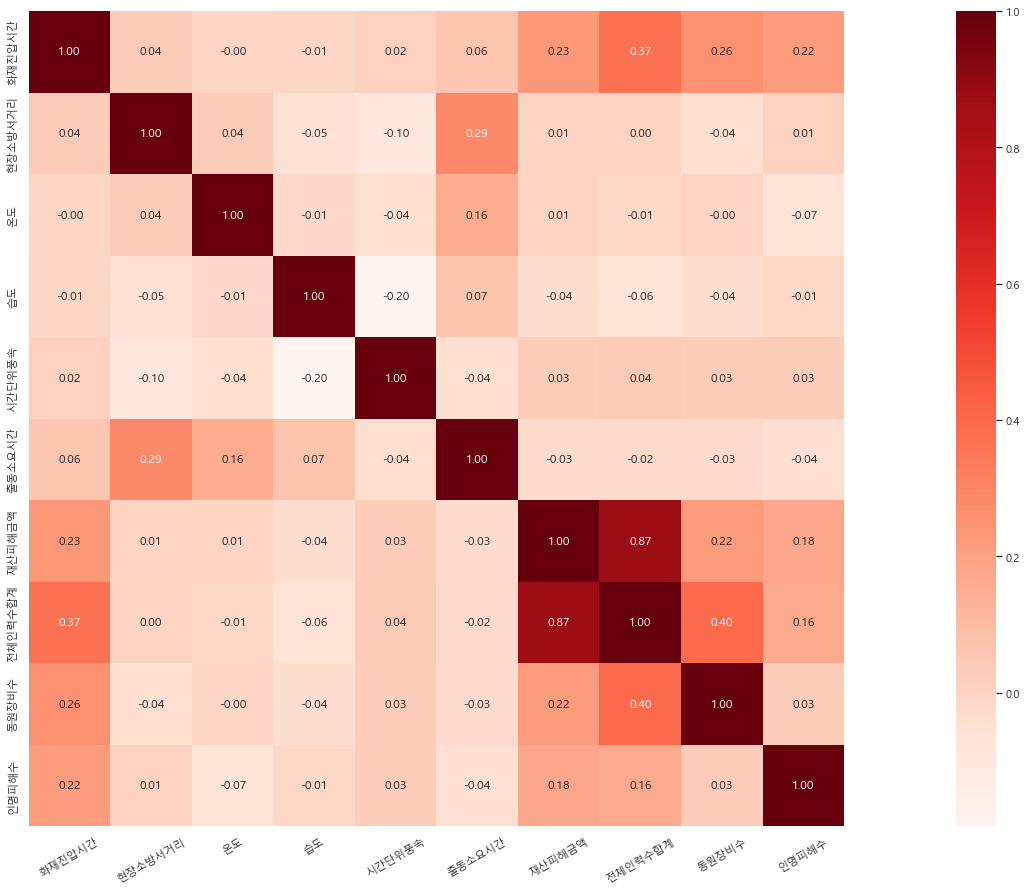

In [124]:
test_heatmap = sns.heatmap(corr,
                          cbar = True,
                          annot = True,
                           fmt = '.2f',
                           square = 'True',
                           cmap='Reds')

plt.xticks(rotation = 30 )
sns.set(rc = {'figure.figsize':(40,15)})
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()


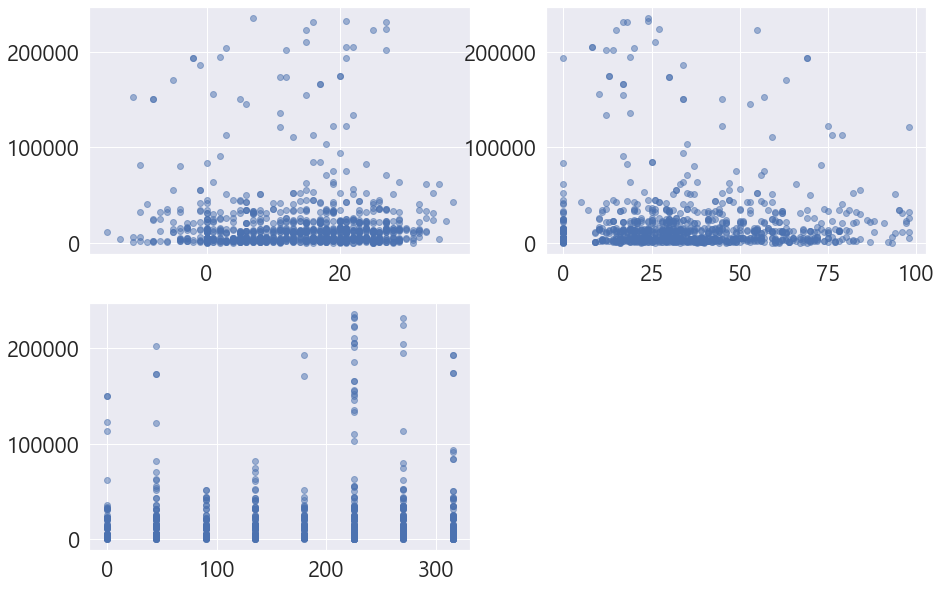

In [83]:
fig = plt.figure(figsize = (15,10))

subplot_temperature = fig.add_subplot(221)
subplot_temperature.scatter(df['온도'],df['화재진압시간'], alpha=0.5)

new_df = df.loc[df['습도'] <= 100, ['습도', '화재진압시간']] # 습도가 500 같은 이상한값이 몇개 있어서 거름 
subplot_humid = fig.add_subplot(222)
subplot_humid.scatter(new_df['습도'], new_df['화재진압시간'], alpha=0.5)

subplot_wind = fig.add_subplot(223)
subplot_wind.scatter(df['시간단위풍속'], df['화재진압시간'], alpha = 0.5)

##딱히 비례관계가 보이지 않음 

In [84]:
#각 기준별로 4개의 그룹으로 분류 
temp_df1 = df.loc[(df['온도'] <= 5)]  # ~5도 이하
temp_df2 = df.loc[(df['온도'] > 5) & (df['온도'] <= 15)] # 5도 초과 ~ 15도 이하
temp_df3 = df.loc[(df['온도'] > 15) & (df['온도'] <= 25)] # 15도 초과 ~ 25도 이하
temp_df4 = df.loc[(df['온도'] >25)] # 25도 초과 ~

temp_list = []
temp_list.append(temp_df1) 
temp_list.append(temp_df2)
temp_list.append(temp_df3)
temp_list.append(temp_df4)

humid_df1 = df.loc[(df['습도'] <= 25)] # ~ 25퍼 이하
humid_df2 = df.loc[(df['습도'] > 25) & (df['습도'] <= 50)] # 25퍼 초과  ~ 50퍼 이하
humid_df3 = df.loc[(df['습도'] > 25) & (df['습도'] <= 75)] # 51퍼 초과 ~ 75퍼 이하
humid_df4 = df.loc[(df['습도'])> 75] # 75퍼 초과 ~ 100퍼 이하

humid_list = []
humid_list.append(humid_df1)
humid_list.append(humid_df2)
humid_list.append(humid_df3)
humid_list.append(humid_df4)

wind_list1 = df.loc[(df['시간단위풍속'] <= 50)] # 50 이하
wind_list2 = df.loc[(df['시간단위풍속'] >50) & (df['시간단위풍속'] <=150)] # 150 이하
wind_list3 = df.loc[(df['시간단위풍속'] >150) & (df['시간단위풍속'] <= 250)] # 250 이하
wind_list4 = df.loc[(df['시간단위풍속'] > 250)] #250 ~ 

wind_list = []
wind_list.append(wind_list1)
wind_list.append(wind_list2)
wind_list.append(wind_list3)
wind_list.append(wind_list4)

19779.487903225807
18106.901360544216
19078.904884318767
20624.479338842975


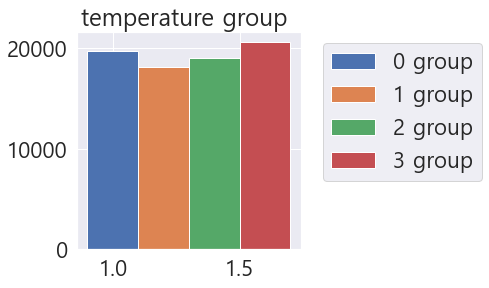

In [85]:
#온도 구간 별 평균
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('temperature group ')
for i in range(4):
    temp = temp_list[i]
    y= temp['화재진압시간'].mean()
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  ~5도 이하
#1그룹 : 5도 ~15도 평균
#2그룹 : 15도 ~25도 평균
#3그룹 : 25도 ~ 평균

21523.41489361702
16370.84064665127
17416.81877022654
21871.86440677966


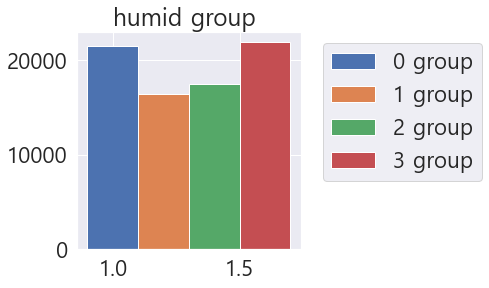

In [86]:
# 습도 구간 별 평균 
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('humid group ')

for i in range(4):
    temp = humid_list[i]
    y= temp['화재진압시간'].mean()
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  ~25
#1그룹 : ~50
#2그룹 : ~75
#3그룹 : ~100

20417.92397660819
14475.8
23038.2874251497
18182.379537953795


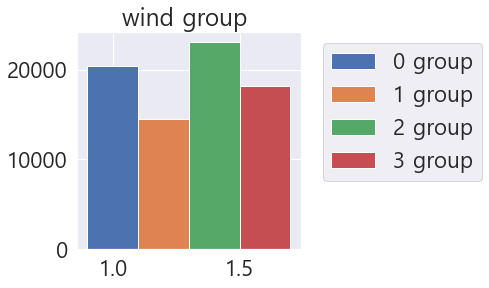

In [87]:
# 바람 구간 별 평균
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('wind group ')
for i in range(4):
    temp = wind_list[i]
    y= temp['화재진압시간'].mean()
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  50 이하
#1그룹 : 150 이하
#2그룹 : 250 이하
#3그룹 : 350 이하 

15145.616822429907
19623.147368421054
22837.30827067669
30921.25
19505.53947368421
14687.969230769231
17067.678947368422
21362.464285714286
27231.636363636364
14573.746666666666
13896.44
19089.095238095237
22343.632653061224
19463.396551724138
19381.057142857142
22025.0


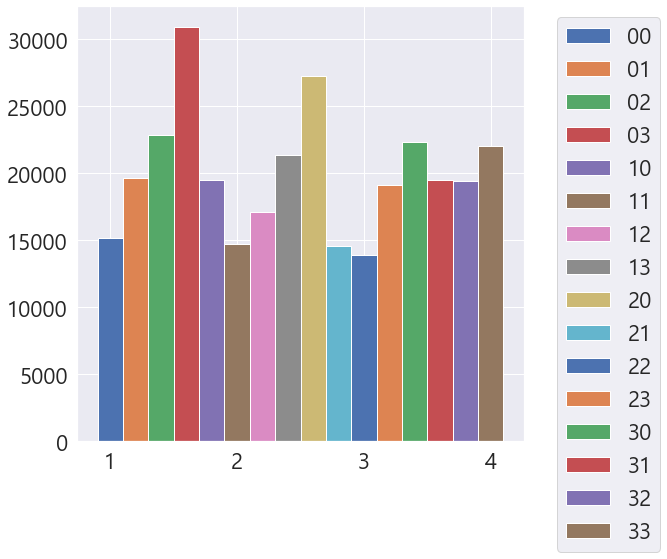

In [88]:
# 온도 + 습도 구간별 평균
# 00 -> 온도 0 구간 + 습도 0 구간 교집합
# 01 -> 온도 0 구간 + 습도 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(temp_list[i], humid_list[j], how = 'inner')
        y= temp_inter['화재진압시간'].mean()
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##가장 높은 빨강 바 == > 03 온도 가장 낮고, 습도 가장 높은

23869.22857142857
10713.42857142857
25474.764705882353
21823.12328767123
21956.055555555555
14505.564516129032
23013.0989010989
12420.89156626506
18224.225806451614
14541.47191011236
21242.766917293233
20028.58823529412
17025.65
19961.923076923078
24833.904761904763
19124.613636363636


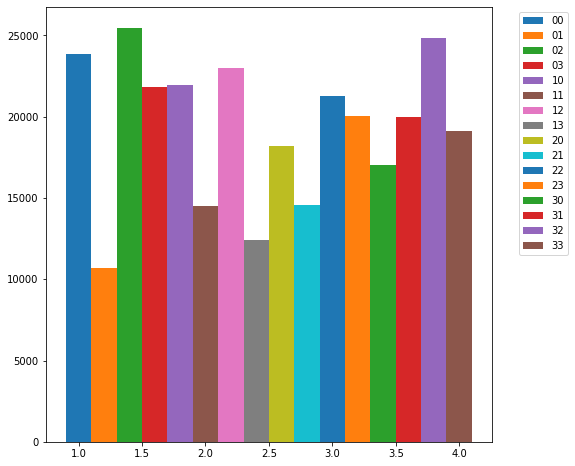

In [122]:
# 온도 + 바랍 구간별 평균
# 00 -> 온도 0 구간 + 바람 0 구간 교집합
# 01 -> 온도 0 구간 + 바람 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(temp_list[i], wind_list[j], how = 'inner')
        y= temp_inter['화재진압시간'].mean()
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##경향성이 있는걸까

17190.695652173912
12755.91489361702
33862.7962962963
20497.756097560974
28018.76923076923
14335.966292134832
15410.307228915663
14571.105691056911
22378.936842105264
14547.3
17792.04147465438
15957.888235294118
19156.466666666667
23418.25
19637.0
27519.6


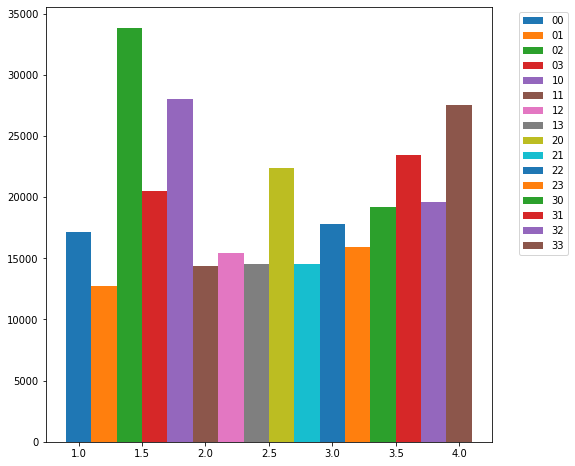

In [124]:
# 습도 + 바랍 구간별 평균
# 00 -> 습도 0 구간 + 바람 0 구간 교집합
# 01 -> 습도 0 구간 + 바람 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(humid_list[i], wind_list[j], how = 'inner')
        y= temp_inter['화재진압시간'].mean()
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##가장 높은 녹색 바 == > 02 습도 가장 적고 , 바람 2구간(중상)

In [ ]:
####
#딱히 경향성이 안보여셔
# 방향성 변경
# 구간 별로 """몇 건"""이 잡히는 지 조사 (얼마나 많은 횟수가 ? 로 포커스 변경 )
#####

248
294
389
121


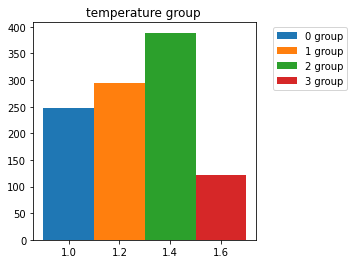

In [125]:
#온도 구간 별 평균
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('temperature group ')
for i in range(4):
    temp = temp_list[i]
    y= temp.shape[0]
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  ~5도 이하
#1그룹 : 5도 ~15도 평균
#2그룹 : 15도 ~25도 평균
#3그룹 : 25도 ~ 평균

376
433
618
59


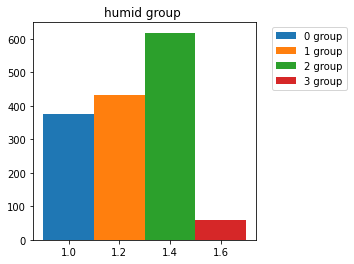

In [126]:
# 습도 구간 별 평균 
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('humid group ')

for i in range(4):
    temp = humid_list[i]
    y= temp.shape[0]
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  ~25
#1그룹 : ~50
#2그룹 : ~75
#3그룹 : ~100

171
185
334
303


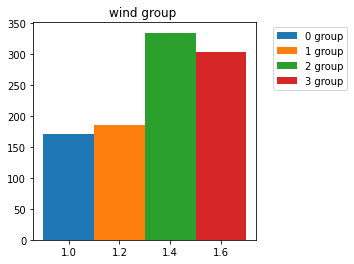

In [127]:
# 바람 구간 별 평균
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2
ax.set_title('wind group ')
for i in range(4):
    temp = wind_list[i]
    y= temp.shape[0]
    print(y)
    ax.bar(np.array(x) + w*i, y, width=w, label=(str(i)+" group"))
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
#0그룹 :  50 이하
#1그룹 : 150 이하
#2그룹 : 250 이하
#3그룹 : 350 이하 

In [ ]:
####
#### 현재까지 잠정결론
#### 산 불이 한 번 나면, 규모는 어느정도 비슷해보임  (돈 규모도 대충해봤는데 얼추 비슷했던듯 )
#### 그러나 '빈번도' 에서는 조금 차이가 남
#### 가령 습도가 너무 높으면 팍 떨어진다던지 , 
#### 바람이 세면 확실히 빈번도가 증가 했다던지 ... 

107
95
133
8
76
130
190
28
143
150
225
21
49
58
70
2


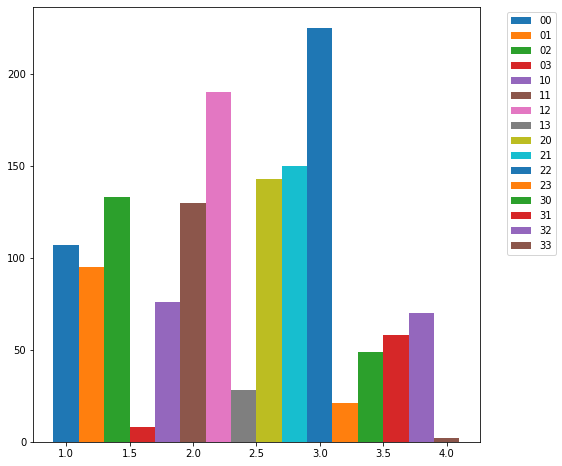

In [128]:
# 온도 + 습도 구간별 평균
# 00 -> 온도 0 구간 + 습도 0 구간 교집합
# 01 -> 온도 0 구간 + 습도 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(temp_list[i], humid_list[j], how = 'inner')
        y= temp_inter.shape[0]
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##온도가 너무 높으면 빈번도 감소
##습도가 더 큰 영향이 있나봄.  너무 습하면 빈번도 감소 

35
21
68
73
54
62
91
83
62
89
133
102
20
13
42
44


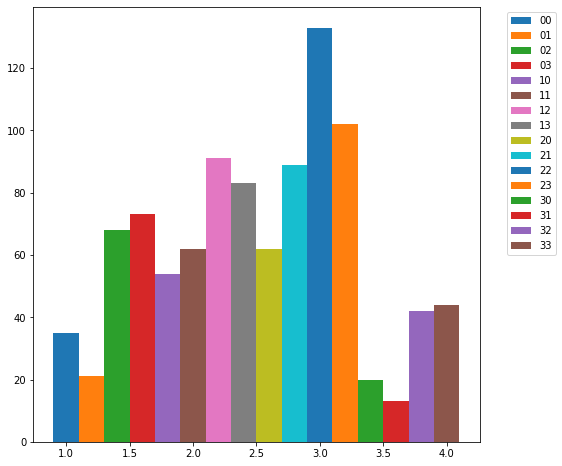

In [131]:
# 온도 + 바랍 구간별 평균
# 00 -> 온도 0 구간 + 바람 0 구간 교집합
# 01 -> 온도 0 구간 + 바람 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(temp_list[i], wind_list[j], how = 'inner')
        y= temp_inter.shape[0]
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##온도가 높으면 빈번도 떨어짐 

46
47
108
123
52
89
166
123
95
130
217
170
30
8
9
10


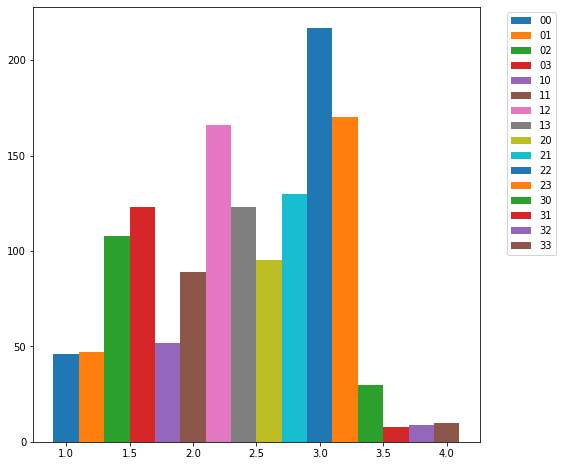

In [130]:
# 습도 + 바랍 구간별 평균
# 00 -> 습도 0 구간 + 바람 0 구간 교집합
# 01 -> 습도 0 구간 + 바람 1 구간 교집합 ....
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0,1,16))

x = [1]
w = 0.2

for i in range(4):
    for j in range(4):
        temp_inter = pd.merge(humid_list[i], wind_list[j], how = 'inner')
        y= temp_inter.shape[0]
        print(y)
        temp_label = str(i)+str(j)
        
        ax.bar(np.array(x) + w *(i*4 + j), y, width=w, label=temp_label) 
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
##이번에도 습도높으면 확 떨어진다 